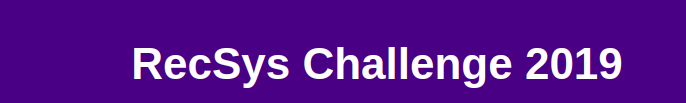

In [1]:
import pandas as pd 
import numpy as np 

# Get data from https://recsys.trivago.cloud/challenge/dataset/

In [2]:
df = pd.read_csv('../data/Rectrain.csv')
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [3]:
df.shape

(15932992, 12)

### Number of all session id in dataset

In [4]:
all_session_ids = df.session_id.unique()
all_session_ids

array(['aff3928535f48', 'fa3a53156ae5c', '3599a6f709eab', ...,
       'e7916050980d9', '061152606ba18', '62728015bec05'], dtype=object)

In [5]:
num_of_session = len(all_session_ids)
num_of_session

910683

#### Check dupliactes

In [6]:
dupli = len(df[(df.session_id.isin(all_session_ids)) & (df.step==1)])
dupli

910732

In [7]:
dupli - num_of_session

49

In [8]:
session_before = list(df[(df.session_id.isin(all_session_ids)) & (df.step==1)].session_id)
len(session_before)

910732

In [9]:
session_after = list(set(list(df[(df.session_id.isin(all_session_ids)) & (df.step==1)].session_id)))
len(session_after)

910683

In [46]:
#df[(df.session_id.isin(all_session_ids)) & (df.step==1)].session_id.drop_duplicates();

In [12]:
df.shape

(15932992, 12)

In [13]:
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [15]:
len(df[(df.session_id.isin(all_session_ids)) & (df.step==1)])

910732

### Get stamp and split data train.csv

In [17]:
stamp = 0.8 

In [18]:
num_train_session = int(stamp * num_of_session)
num_train_session

728546

In [19]:
dftrain_end_session_id = all_session_ids[num_train_session]
dftrain_end_session_id

'cae8906db6f21'

In [20]:
df[df.session_id==dftrain_end_session_id].tail()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756498,XI4V09UQBBN2,cae8906db6f21,1541491922,25,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12756499,XI4V09UQBBN2,cae8906db6f21,1541491925,26,change of sort order,price only,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12756500,XI4V09UQBBN2,cae8906db6f21,1541491925,27,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12756501,XI4V09UQBBN2,cae8906db6f21,1541491925,28,filter selection,Sort by Price,TW,"Nantou City, Taiwan",desktop,Sort by Price,NaN,NaN
12756502,XI4V09UQBBN2,cae8906db6f21,1541491953,29,clickout item,3857806,TW,"Nantou City, Taiwan",desktop,Sort by Price,4182178|3861994|5832464|1908423|5740296|671947...,64|65|74|80|82|84|85|85|85|86|87|87|88|91|91|9...


In [21]:
dftrain_last_index = df[df.session_id==dftrain_end_session_id][-1:].index
dftrain_last_index

Int64Index([12756502], dtype='int64')

In [22]:
dftrain_last_index = int(dftrain_last_index[0])
dftrain_last_index

12756502

### Split dataset to df train and df test

In [23]:
df_train = df[:dftrain_last_index+1]

In [24]:
df_train.shape

(12756503, 12)

In [25]:
df_train.tail()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756498,XI4V09UQBBN2,cae8906db6f21,1541491922,25,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12756499,XI4V09UQBBN2,cae8906db6f21,1541491925,26,change of sort order,price only,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12756500,XI4V09UQBBN2,cae8906db6f21,1541491925,27,interaction item image,5740296,TW,"Nantou City, Taiwan",desktop,NaN,NaN,NaN
12756501,XI4V09UQBBN2,cae8906db6f21,1541491925,28,filter selection,Sort by Price,TW,"Nantou City, Taiwan",desktop,Sort by Price,NaN,NaN
12756502,XI4V09UQBBN2,cae8906db6f21,1541491953,29,clickout item,3857806,TW,"Nantou City, Taiwan",desktop,Sort by Price,4182178|3861994|5832464|1908423|5740296|671947...,64|65|74|80|82|84|85|85|85|86|87|87|88|91|91|9...


In [26]:
groundTruth = df[dftrain_last_index+1:]

In [27]:
groundTruth.head(13)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756503,XI9W70AM4A2E,49fbcccb30f40,1541475471,1,search for poi,Ueno Station,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756504,XI9W70AM4A2E,49fbcccb30f40,1541475479,2,interaction item info,1148728,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756505,XI9W70AM4A2E,49fbcccb30f40,1541475635,3,change of sort order,rating and recommended,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756506,XI9W70AM4A2E,49fbcccb30f40,1541475635,4,change of sort order,interaction sort button,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756507,XI9W70AM4A2E,49fbcccb30f40,1541475635,5,change of sort order,interaction sort button,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756508,XI9W70AM4A2E,49fbcccb30f40,1541475635,6,filter selection,Focus on Rating,JP,"Tokyo, Japan",desktop,Focus on Rating,NaN,NaN
12756509,XI9W70AM4A2E,49fbcccb30f40,1541476161,7,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756510,XI9W70AM4A2E,49fbcccb30f40,1541476161,8,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756511,XI9W70AM4A2E,49fbcccb30f40,1541476176,9,clickout item,103501,JP,"Tokyo, Japan",desktop,Focus on Rating,2266812|4675284|321771|3143731|103644|3509932|...,371|100|166|168|250|143|113|121|58|109|265|91|...
12756512,XI9W70AM4A2E,49fbcccb30f40,1541476182,10,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN


## Change data test 
### put nan in reference when is last step and action_type is clickout_item

#### Get index of first step in df test

In [28]:
df_test = groundTruth.copy()

In [29]:
idx_step_1 = np.array(df_test[df_test.step == 1].index)
idx_step_1[:5]

array([12756503, 12756514, 12756515, 12756516, 12756563])

Get last index, but we have to check that the last is also not first  [1: to last] , becasuse first is the first row in data test set, but we want to get step before first step, so we have to get index from [1: ] 

In [30]:
idx_last_step = [x-1 for x in idx_step_1[1:] ]

In [31]:
idx_last_step[:5]

[12756513, 12756514, 12756515, 12756562, 12756565]

In [32]:
df_test[df_test.index.isin(idx_last_step)].head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756513,XI9W70AM4A2E,49fbcccb30f40,1541476182,11,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756514,XJU3EN88E88X,dc52a1e8c459a,1541505439,1,search for destination,"Lonavala, India",IN,"Lonavala, India",mobile,NaN,NaN,NaN
12756515,XK9Q5KDFWUO8,c039590a248a1,1541468709,1,clickout item,6694076,US,"Belek, Turkey",mobile,NaN,6694076|6160412|908005|1256006|37745|1167790|2...,341|190|372|514|268|172|161|325|149|899|254|26...
12756562,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541531104,47,interaction item image,8110264,IN,"Ahmedabad, India",desktop,NaN,NaN,NaN
12756565,XO5V9JATXNZ0,12e45ec9f55a9,1541532176,3,clickout item,935261,IE,"Dún Laoghaire, Ireland",desktop,NaN,935261|46149|148250|640521|12504|46041|46127|4...,155|256|104|112|294|70|128|138|251|112|164|254...


### Change reference to NaN

In [33]:
df_test_label = df_test[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item')]['reference']

In [34]:
df_test.loc[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item'), 'reference'] = np.nan

In [35]:
df_test[df_test.action_type=='clickout item'].head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756511,XI9W70AM4A2E,49fbcccb30f40,1541476176,9,clickout item,103501,JP,"Tokyo, Japan",desktop,Focus on Rating,2266812|4675284|321771|3143731|103644|3509932|...,371|100|166|168|250|143|113|121|58|109|265|91|...
12756515,XK9Q5KDFWUO8,c039590a248a1,1541468709,1,clickout item,NaN,US,"Belek, Turkey",mobile,NaN,6694076|6160412|908005|1256006|37745|1167790|2...,341|190|372|514|268|172|161|325|149|899|254|26...
12756553,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541530540,38,clickout item,5838026,IN,"Ahmedabad, India",desktop,NaN,5959374|3763928|2660559|5838026|4967826|472502...,46|42|21|27|21|24|50|13|58|22|20|19|20|34|16|1...
12756565,XO5V9JATXNZ0,12e45ec9f55a9,1541532176,3,clickout item,NaN,IE,"Dún Laoghaire, Ireland",desktop,NaN,935261|46149|148250|640521|12504|46041|46127|4...,155|256|104|112|294|70|128|138|251|112|164|254...
12756567,XPXXNDO87ZLO,ecfe498274283,1541517922,2,clickout item,4536970,JP,"Naha, Japan",desktop,NaN,4536970|1751231|1023329|346856|7379644|103471|...,361|324|251|626|664|668|369|325|390|366|388|40...


In [36]:
df_test[df_test.index.isin([14214360,14214361, 14214359, 14214358, 14214362, 14214363, 14214364])]

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
14214358,ZQW8Y2QX8L54,6471c7602d7fa,1541537036,36,filter selection,Sort by Price,FR,"Illkirch-Graffenstaden, France",desktop,Hotel|Motel|Resort|Hostal (ES)|Sort by Price,NaN,NaN
14214359,ZSJ7ZNLB6JQH,b2fbf464bac70,1541518427,1,clickout item,NaN,BR,"Porto Seguro, Brazil",mobile,NaN,503361|477936|745041|1326068|478246|1540073|18...,188|33|36|45|61|70|55|432|18|33|33|64|35|44|42...
14214360,004TRXM7ZRI5,402fd7dfec659,1541099456,1,clickout item,6446,UK,"Cologne, Germany",tablet,NaN,14944|13336|53552|14943|6447|6489|52014|6436|6...,92|71|64|93|110|81|94|104|148|81|107|106|73|60...
14214361,004TRXM7ZRI5,402fd7dfec659,1541099525,2,clickout item,NaN,UK,"Cologne, Germany",tablet,NaN,14944|13336|53552|14943|6447|6489|52014|6436|6...,92|71|64|93|110|81|94|104|148|81|107|106|73|60...
14214362,02TH600FSLRF,3655ef6cdecaa,1541068236,1,search for destination,"Trabzon, Turkey",TR,"Trabzon, Turkey",mobile,NaN,NaN,NaN
14214363,02TH600FSLRF,3655ef6cdecaa,1541068293,2,interaction item image,3893068,TR,"Trabzon, Turkey",mobile,NaN,NaN,NaN
14214364,02TH600FSLRF,3655ef6cdecaa,1541068293,3,interaction item image,3893068,TR,"Trabzon, Turkey",mobile,NaN,NaN,NaN


In [37]:
def split_dataset(df, stamp):
    all_session_ids = df.session_id.unique()
    num_of_session = len(all_session_ids)
    num_train_session = int(stamp * num_of_session)
    dftrain_end_session_id = all_session_ids[num_train_session]
    dftrain_last_index = int(df[df.session_id==dftrain_end_session_id][-1:].index[0])
    df_train = df[:dftrain_last_index+1]
    groundTruth = df[dftrain_last_index+1:]
    idx_step_1 = np.array(groundTruth[groundTruth.step == 1].index)
    idx_last_step = [x-1 for x in idx_step_1[1:] ]
    df_test = groundTruth.copy()
    df_test_label = df_test[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item')]['reference']
    df_test.loc[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item'), 'reference'] = np.nan
    df_train.to_csv('../data/train.csv')
    groundTruth.to_csv('../data/groundTruth.csv')
    df_test.to_csv('../data/test.csv')
    df_test_label.to_csv('../data/reference.csv')
    return df_train, df_test, groundTruth

In [38]:
df_train, df_test, groundTruth= split_dataset(df, 0.8)

/home/agnieszka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


# duplicated! 

In [39]:
df_test[df_test.session_id == '7a37b2c63a02f']

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12784886,3O0IAI6ZFBGH,7a37b2c63a02f,1541258940,1,interaction item image,5962100,IT,"Courmayeur, Italy",mobile,NaN,NaN,NaN
12784887,3O0IAI6ZFBGH,7a37b2c63a02f,1541258940,2,interaction item image,5962100,IT,"Courmayeur, Italy",mobile,NaN,NaN,NaN
12784888,3O0IAI6ZFBGH,7a37b2c63a02f,1541258941,3,clickout item,5962100,IT,"Courmayeur, Italy",mobile,NaN,48435|49815|100062|1318392|1357033|49025|59621...,62|72|70|78|59|70|90|101|85|136|65|72|60|78|10...
12784889,3O0IAI6ZFBGH,7a37b2c63a02f,1541259130,4,clickout item,1318392,IT,"Courmayeur, Italy",mobile,NaN,48435|49815|100062|1318392|1357033|49025|59621...,62|72|70|78|59|70|90|101|85|136|65|72|60|78|10...
12784890,3O0IAI6ZFBGH,7a37b2c63a02f,1541259617,5,interaction item deals,2330268,IT,"Vicoforte, Italy",mobile,NaN,NaN,NaN
12784891,3O0IAI6ZFBGH,7a37b2c63a02f,1541259622,6,clickout item,6711122,IT,"Vicoforte, Italy",mobile,NaN,2330268|889763|2223560|2863680|4322768|6910330...,90|62|70|80|59|57|70|71|99|65|61|65|66|77|78|6...
12784892,3O0IAI6ZFBGH,7a37b2c63a02f,1541259869,7,interaction item deals,1236561,IT,"Venice, Italy",mobile,NaN,NaN,NaN
12784893,3O0IAI6ZFBGH,7a37b2c63a02f,1541259890,8,interaction item image,909195,IT,"Venice, Italy",mobile,NaN,NaN,NaN
12784894,3O0IAI6ZFBGH,7a37b2c63a02f,1541259890,9,interaction item image,909195,IT,"Venice, Italy",mobile,NaN,NaN,NaN
12784895,3O0IAI6ZFBGH,7a37b2c63a02f,1541260387,10,interaction item deals,1388712,IT,"Martano, Italy",mobile,NaN,NaN,NaN


In [40]:
df_test.head(15).tail(5)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756513,XI9W70AM4A2E,49fbcccb30f40,1541476182,11,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756514,XJU3EN88E88X,dc52a1e8c459a,1541505439,1,search for destination,"Lonavala, India",IN,"Lonavala, India",mobile,NaN,NaN,NaN
12756515,XK9Q5KDFWUO8,c039590a248a1,1541468709,1,clickout item,NaN,US,"Belek, Turkey",mobile,NaN,6694076|6160412|908005|1256006|37745|1167790|2...,341|190|372|514|268|172|161|325|149|899|254|26...
12756516,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541530339,1,interaction item image,5838026,IN,"Ahmedabad, India",desktop,NaN,NaN,NaN
12756517,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541530339,2,interaction item image,5838026,IN,"Ahmedabad, India",desktop,NaN,NaN,NaN


In [41]:
groundTruth.head(15).tail(5)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
12756513,XI9W70AM4A2E,49fbcccb30f40,1541476182,11,interaction item image,103501,JP,"Tokyo, Japan",desktop,NaN,NaN,NaN
12756514,XJU3EN88E88X,dc52a1e8c459a,1541505439,1,search for destination,"Lonavala, India",IN,"Lonavala, India",mobile,NaN,NaN,NaN
12756515,XK9Q5KDFWUO8,c039590a248a1,1541468709,1,clickout item,6694076,US,"Belek, Turkey",mobile,NaN,6694076|6160412|908005|1256006|37745|1167790|2...,341|190|372|514|268|172|161|325|149|899|254|26...
12756516,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541530339,1,interaction item image,5838026,IN,"Ahmedabad, India",desktop,NaN,NaN,NaN
12756517,XN7BVE3ZYOUQ,59f9c54ef3bb0,1541530339,2,interaction item image,5838026,IN,"Ahmedabad, India",desktop,NaN,NaN,NaN


# Groupby 

In [42]:
grouped_df = df.groupby(['session_id', 'timestamp', 'step'])

In [43]:
grouped_df.first()

user_id             action_type  \
session_id    timestamp  step                                         
00000510f1adc 1541064087 1     WT30CXPIG450           clickout item   
00003f3b20954 1541097696 1     CITFOTN2IT5P           clickout item   
000056cd97ce2 1541483846 1     0TBXPQCK401O         search for item   
              1541483874 2     0TBXPQCK401O         search for item   
              1541483924 3     0TBXPQCK401O           clickout item   
              1541484101 4     0TBXPQCK401O           clickout item   
000066611146f 1541332305 1     XRIOQ0R1CHLT        filter selection   
                         2     XRIOQ0R1CHLT        filter selection   
              1541332330 3     XRIOQ0R1CHLT           clickout item   
00008c1f39c46 1541302205 1     MSD74FLNTFNE          search for poi   
              1541302369 2     MSD74FLNTFNE         search for item   
              1541302385 3     MSD74FLNTFNE   interaction item info   
              1541302405 4     MSD74FLNTFNE   interaction item info   
0000be39860d7 1541102752 1     X931R6LTG2RE  interaction item image   
                         2     X931R6LTG2RE  interaction item image   
              1541102762 3     X931R6LTG2RE  interaction item image   
                         4     X931R6LTG2RE  interaction item image   
                         5     X931R6LTG2RE  interaction item image   
                         6     X931R6LTG2RE  interaction item image   
                         7     X931R6LTG2RE  interaction item image   
              1541102772 8     X931R6LTG2RE  interaction item image   
                         9     X931R6LTG2RE  interaction item image   
                         10    X931R6LTG2RE  interaction item image   
                         11    X931R6LTG2RE  interaction item image   
                         12    X931R6LTG2RE  interaction item image   
                         13    X931R6LTG2RE  interaction item image   
                         14    X931R6LTG2RE  interaction item image   
                         15    X931R6LTG2RE  interaction item image   
              1541102782 16    X931R6LTG2RE  interaction item image   
                         17    X931R6LTG2RE  interaction item image   
...                                     ...                     ...   
s8u671odd7ckk 1541376835 5     T0QB3YFIHKA3  interaction item image   
                         6     T0QB3YFIHKA3  interaction item image   
              1541376857 7     T0QB3YFIHKA3  interaction item image   
                         8     T0QB3YFIHKA3  interaction item image   
                         9     T0QB3YFIHKA3  interaction item image   
                         10    T0QB3YFIHKA3           clickout item   
              1541376865 11    T0QB3YFIHKA3  interaction item image   
                         12    T0QB3YFIHKA3  interaction item image   
                         13    T0QB3YFIHKA3  interaction item image   
                         14    T0QB3YFIHKA3  interaction item image   
                         15    T0QB3YFIHKA3  interaction item image   
                         16    T0QB3YFIHKA3  interaction item image   
tpc71ussgcuou 1541523289 1     W2EZ7V7KH5QE           clickout item   
u5e4la6f115r1 1541529473 1     HCN2L5VRPGQX           clickout item   
udmhn71cn8500 1541245078 1     XDKQOLXCI4OR           clickout item   
              1541245242 2     XDKQOLXCI4OR  interaction item image   
                         3     XDKQOLXCI4OR  interaction item image   
                         4     XDKQOLXCI4OR   interaction item info   
              1541245252 5     XDKQOLXCI4OR  interaction item image   
                         6     XDKQOLXCI4OR  interaction item image   
                         7     XDKQOLXCI4OR  interaction item image   
                         8     XDKQOLXCI4OR  interaction item image   
                         9     XDKQOLXCI4OR  interaction item image   
                         10    XDKQOLXCI4OR  interaction ite